In [30]:
from collections import defaultdict
import pickle

import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls


Untitled.ipynb	       test_probability_ranks.ipynb
bootstrap_metrics.pcl  test_replay.ipynb


In [3]:
with open("bootstrap_metrics.pcl", "rb") as f:
    q = pickle.load(f)

In [4]:
q

[('bpr0', 'beeradvocate', 0.054208259983981114, 0.0019138265798180588),
 ('bpr1', 'beeradvocate', 0.057345570874786964, 0.0015593473235613587),
 ('als0', 'beeradvocate', 0.0680871313010167, 0.002814088999538827),
 ('als1', 'beeradvocate', 0.06943414428715189, 0.003140336739994456),
 ('bpr0', 'brightkite', 0.04866861353794921, 0.002577004654956369),
 ('bpr1', 'brightkite', 0.050491636557448524, 0.0033694838496130413),
 ('als0', 'brightkite', 0.12379843954944744, 0.00520371100121826),
 ('als1', 'brightkite', 0.11955352702842854, 0.004854993356969203),
 ('bpr0', 'dianping', 0.0020670537155978936, 0.00014236142028740135),
 ('bpr1', 'dianping', 0.005169000688175671, 0.00037466424171899793),
 ('als0', 'dianping', 0.0020943262648435174, 0.0002195359291746289),
 ('als1', 'dianping', 0.0020951343482920612, 0.0001536731728498552),
 ('bpr0', 'douban_books', 0.006373803496246418, 0.001773255441733465),
 ('bpr1', 'douban_books', 0.007511144377376831, 0.0007761717183038147),
 ('als0', 'douban_books'

In [12]:
datasets = set()
methods = set()

results = defaultdict(dict)

for x in q:
    datasets.add(x[1])
    methods.add(x[0])
    
    results[x[0]][x[1]] = [x[2], x[3]]
    
    print(x)

('bpr0', 'beeradvocate', 0.054208259983981114, 0.0019138265798180588)
('bpr1', 'beeradvocate', 0.057345570874786964, 0.0015593473235613587)
('als0', 'beeradvocate', 0.0680871313010167, 0.002814088999538827)
('als1', 'beeradvocate', 0.06943414428715189, 0.003140336739994456)
('bpr0', 'brightkite', 0.04866861353794921, 0.002577004654956369)
('bpr1', 'brightkite', 0.050491636557448524, 0.0033694838496130413)
('als0', 'brightkite', 0.12379843954944744, 0.00520371100121826)
('als1', 'brightkite', 0.11955352702842854, 0.004854993356969203)
('bpr0', 'dianping', 0.0020670537155978936, 0.00014236142028740135)
('bpr1', 'dianping', 0.005169000688175671, 0.00037466424171899793)
('als0', 'dianping', 0.0020943262648435174, 0.0002195359291746289)
('als1', 'dianping', 0.0020951343482920612, 0.0001536731728498552)
('bpr0', 'douban_books', 0.006373803496246418, 0.001773255441733465)
('bpr1', 'douban_books', 0.007511144377376831, 0.0007761717183038147)
('als0', 'douban_books', 0.006902681457884944, 0.001

In [22]:
n = 100
full_dict = dict()
for _ in range(n):
    for case in datasets:
        tmp_dict = dict()
        values = []
        for method in methods:
            if method not in full_dict:
                full_dict[method] = dict()
            if case not in full_dict[method]:
                full_dict[method][case] = 0

            x = results[method][case]
            metric = np.random.normal(x[0], x[1])
            tmp_dict[method] = metric
            values.append(metric)
        tmp_dict = {k: v for k, v in sorted(tmp_dict.items(), key=lambda item: item[1], reverse=True)}
        print(tmp_dict)
        print(list(tmp_dict.keys())[0])
        full_dict[list(tmp_dict.keys())[0]][case] += 1
    
        
#     break

{'als0': 0.021483297103521346, 'als1': 0.01619780775862273, 'bpr1': 0.009887453922162736, 'bpr0': 0.008356426491643865}
als0
{'als0': 0.01794041370394516, 'als1': 0.014659174886653744, 'bpr1': 0.011564767838562893, 'bpr0': 0.007722973136023175}
als0
{'bpr1': 0.020772461215821103, 'als1': 0.020267803508752177, 'bpr0': 0.01809795225532859, 'als0': 0.017339083435704936}
bpr1
{'bpr0': 0.0034409033345613187, 'bpr1': 0.0028372398758610305, 'als0': 0.0018108306429730668, 'als1': 0.0011752575324265615}
bpr0
{'als1': 0.06307527556975841, 'bpr0': 0.060912692462160085, 'als0': 0.05886488495193794, 'bpr1': 0.055205042115139755}
als1
{'bpr1': 0.005468383426408439, 'als0': 0.0020680665145919996, 'bpr0': 0.001968231223899199, 'als1': 0.0018772204500342598}
bpr1
{'als1': 0.009479297353663494, 'bpr0': 0.008797188155447153, 'als0': 0.007221891239211243, 'bpr1': 0.0058933006087514275}
als1
{'als0': 0.035167167674131874, 'bpr0': 0.03340045608586312, 'als1': 0.024762148337843355, 'bpr1': 0.0214978185523519

In [28]:
output = dict()
for k in full_dict:
    output[k] = sum(full_dict[k].values()) / 100
    print(k, sum(full_dict[k].values()) / 100)

als0 2.84
bpr0 1.78
als1 2.99
bpr1 2.39


In [29]:
{k: v for k, v in sorted(output.items(), key=lambda item: item[1], reverse=True)}

{'als1': 2.99, 'als0': 2.84, 'bpr1': 2.39, 'bpr0': 1.78}

In [36]:
pretty_names = {'als1': 'als_optimized', 'als0': 'als', 'bpr1': 'bpr_optimized', 'bpr0': 'bpr'}

In [37]:
output

{'als0': 2.84, 'bpr0': 1.78, 'als1': 2.99, 'bpr1': 2.39}

In [38]:
new_dict = {pretty_names[k]: v for k, v in output.items()}

<BarContainer object of 4 artists>

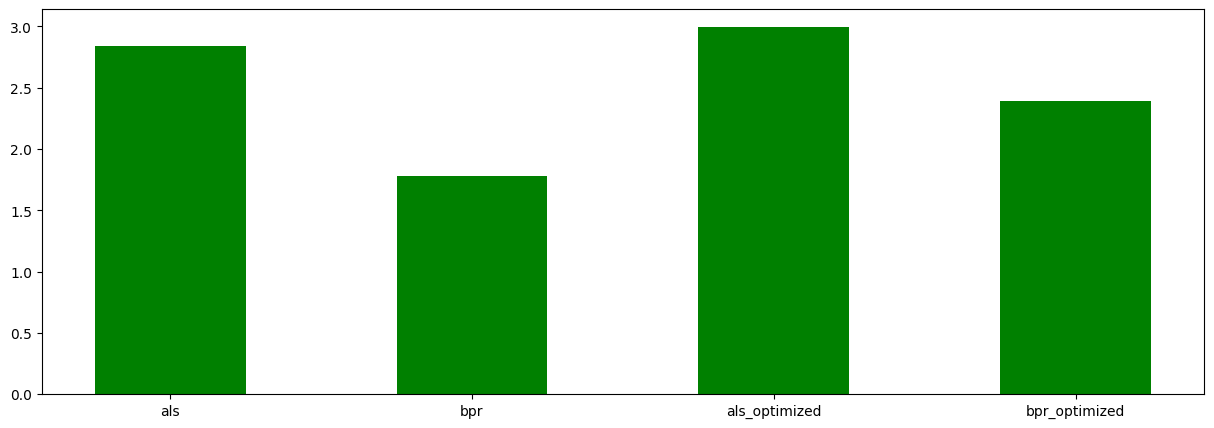

In [39]:

plt.figure(figsize=(15,5))

plt.bar(new_dict.keys(), new_dict.values(), width=.5, color='g')

In [41]:
cur_datasets = list(datasets)[0]

In [46]:
new_output = dict()
for method in methods:
    new_output[pretty_names[method]] = full_dict[method][cur_datasets]

In [47]:
new_output

{'als': 23, 'bpr': 0, 'als_optimized': 20, 'bpr_optimized': 57}

<BarContainer object of 4 artists>

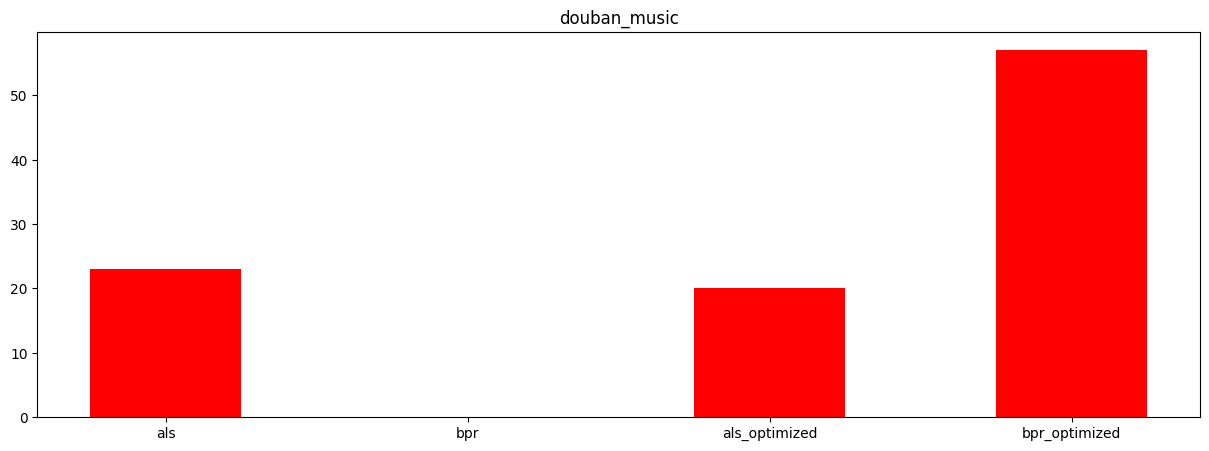

In [48]:

plt.figure(figsize=(15,5))
plt.title(cur_datasets)
plt.bar(new_output.keys(), new_output.values(), width=.5, color='r')

In [45]:
full_dict

{'als0': {'douban_music': 23,
  'food': 80,
  'douban_movies': 2,
  'reddit': 1,
  'ratebeer': 25,
  'dianping': 0,
  'douban_books': 32,
  'foursquare': 8,
  'beeradvocate': 36,
  'brightkite': 77},
 'bpr0': {'douban_music': 0,
  'food': 0,
  'douban_movies': 0,
  'reddit': 92,
  'ratebeer': 2,
  'dianping': 0,
  'douban_books': 15,
  'foursquare': 69,
  'beeradvocate': 0,
  'brightkite': 0},
 'als1': {'douban_music': 20,
  'food': 20,
  'douban_movies': 50,
  'reddit': 2,
  'ratebeer': 73,
  'dianping': 0,
  'douban_books': 24,
  'foursquare': 23,
  'beeradvocate': 64,
  'brightkite': 23},
 'bpr1': {'douban_music': 57,
  'food': 0,
  'douban_movies': 48,
  'reddit': 5,
  'ratebeer': 0,
  'dianping': 100,
  'douban_books': 29,
  'foursquare': 0,
  'beeradvocate': 0,
  'brightkite': 0}}

In [13]:
results

defaultdict(dict,
            {'bpr0': {'beeradvocate': [0.054208259983981114,
               0.0019138265798180588],
              'brightkite': [0.04866861353794921, 0.002577004654956369],
              'dianping': [0.0020670537155978936, 0.00014236142028740135],
              'douban_books': [0.006373803496246418, 0.001773255441733465],
              'douban_movies': [0.017521845988598243, 0.0011455876289211291],
              'douban_music': [0.007773645966155087, 0.0016123167076579922],
              'food': [0.009062332989249633, 0.000868871821738481],
              'foursquare': [0.034871156509838484, 0.003825746281669981],
              'ratebeer': [0.05761778086848006, 0.0032636486180004204],
              'reddit': [0.0034926132087915326, 0.0006250652271052418]},
             'bpr1': {'beeradvocate': [0.057345570874786964,
               0.0015593473235613587],
              'brightkite': [0.050491636557448524, 0.0033694838496130413],
              'dianping': [0.005169000688

In [7]:
datasets

{'beeradvocate',
 'brightkite',
 'dianping',
 'douban_books',
 'douban_movies',
 'douban_music',
 'food',
 'foursquare',
 'ratebeer',
 'reddit'}